In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score, recall_score, f1_score,matthews_corrcoef
import warnings 
warnings.filterwarnings('ignore')
data=pd.read_csv(r"C:\Users\Admin\OneDrive\document\ds job apply documents\credit_card.csv")
data.head()
print(data.shape)
print(data.describe())
data.info()
features=data.iloc[:,0:29].columns
plt.figure(figsize=(12,29*4))
gs = gridspec.GridSpec(29,1)


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271

<Figure size 1200x11600 with 0 Axes>

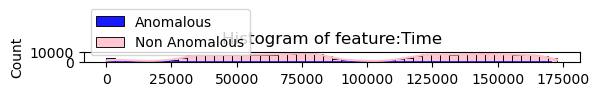

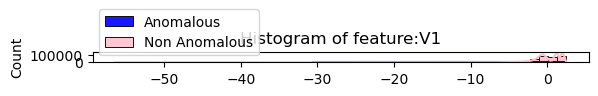

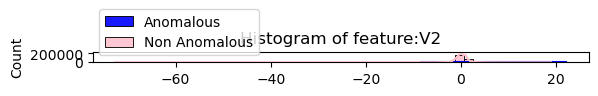

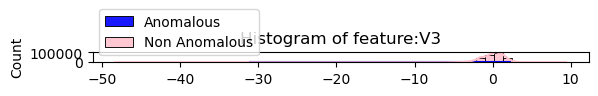

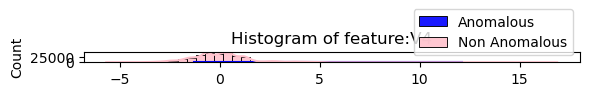

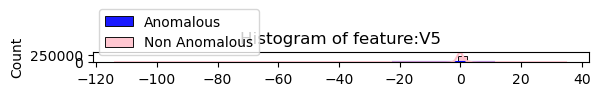

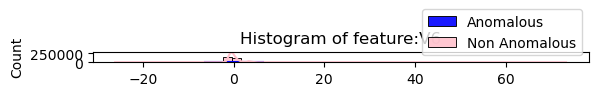

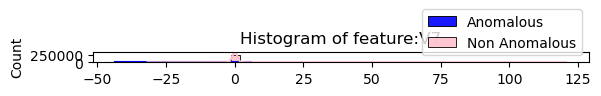

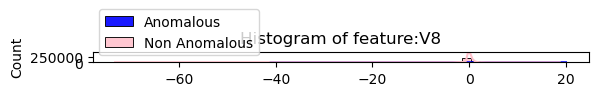

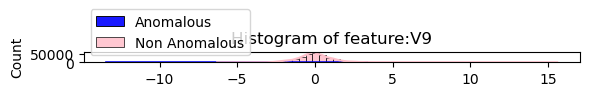

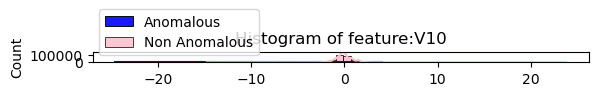

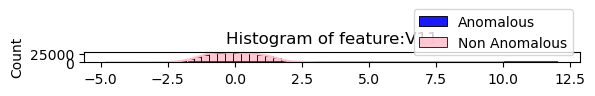

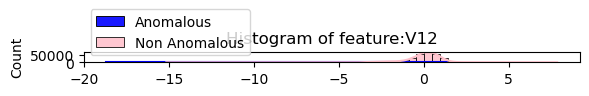

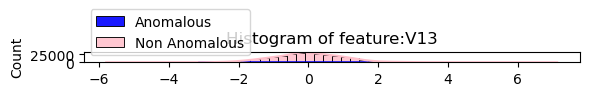

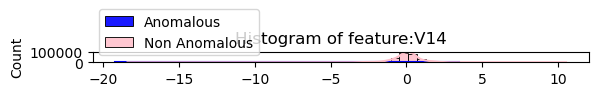

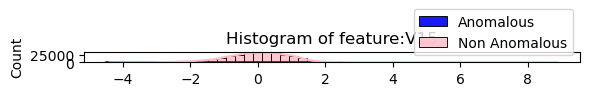

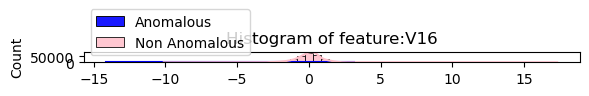

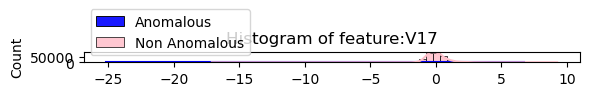

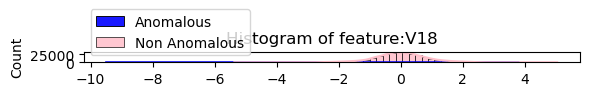

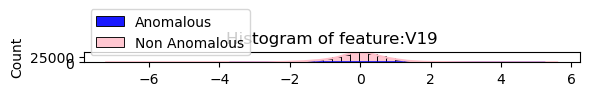

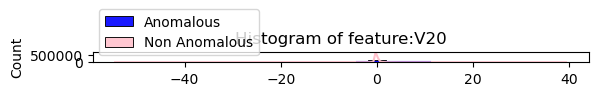

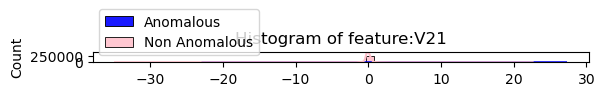

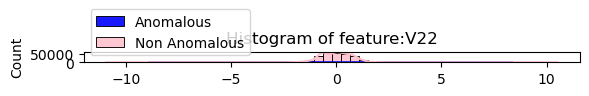

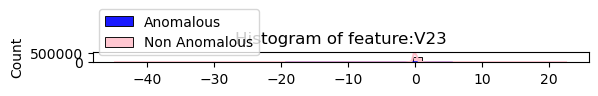

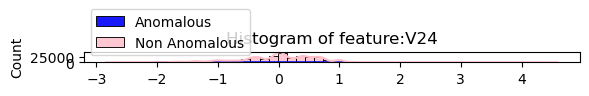

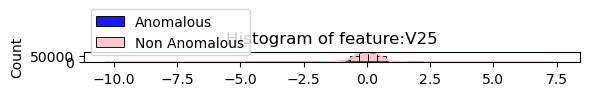

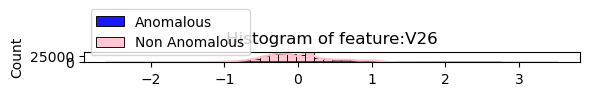

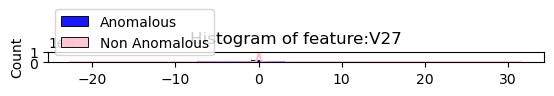

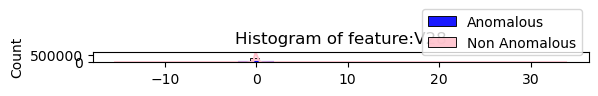

In [11]:
for i, c in enumerate(features):
    plt.subplot(gs[i])
    sns.histplot(data=data[data.Class==1][c], bins=50,kde=True, color='blue',label='Anomalous', alpha=0.9)
    sns.histplot(data=data[data.Class==0][c], bins=50,kde=True, color='pink',label='Non Anomalous', alpha=0.88)
    plt.xlabel('')
    plt.title('Histogram of feature:'+str(c))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [29]:
fraud = data[data.Class==1]
valid = data[data.Class==0]
outlier_fraction= len(fraud)/float(len(valid))
print(outlier_fraction)
print('fraud case{}'.format(len(data[data['Class']==1])))
print('valid Transaction :{}'. format(len(data[data['Class']==0])))

print("Amount details of fraudulent transaction")
fraud.Amount.describe()

print("Amount details of valid transaction")
valid.Amount.describe()

0.0017304750013189597
fraud case492
valid Transaction :284315
Amount details of fraudulent transaction
Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

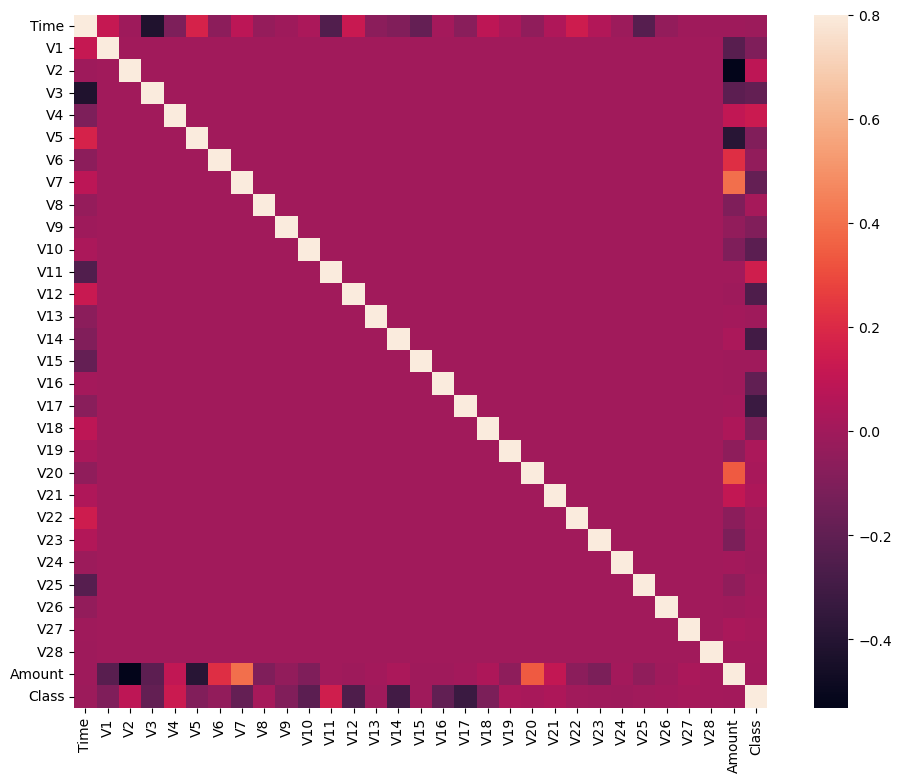

In [31]:
corrmat= data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square = True)
plt.show()

In [37]:
from imblearn.over_sampling import SMOTE
x=data.drop(['Class'], axis=1)
y=data['Class']
print(x.shape)
print(y.shape)
x_data=x.values
y_data=y.values
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
x_train.head()
x_test.head()
y_train.head()
y_test.head()

(284807, 30)
(284807,)


43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64

In [45]:
# RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
n_outliers= len(fraud)
n_errors= (y_pred!= y_test).sum()
print("The model used is Random Forest Classifier ")
acc=accuracy_score((y_test), y_pred)
print("the accuracy is {}".format(acc))
prec= precision_score(y_test, y_pred)
print("the precision is {}".format(prec))
rec = recall_score(y_test, y_pred)
print ("The recall is {}".format(rec))
f1=f1_score(y_test,y_pred)
print("The f1-Score is {}".format(f1))
mcc= matthews_corrcoef(y_test, y_pred)
print("matthews correlation coefficient is {}".format(mcc))


The model used is Random Forest Classifier 
the accuracy is 0.9995903701883126
the precision is 0.9316239316239316
The recall is 0.8014705882352942
The f1-Score is 0.8616600790513834
matthews correlation coefficient is 0.8639029062140001


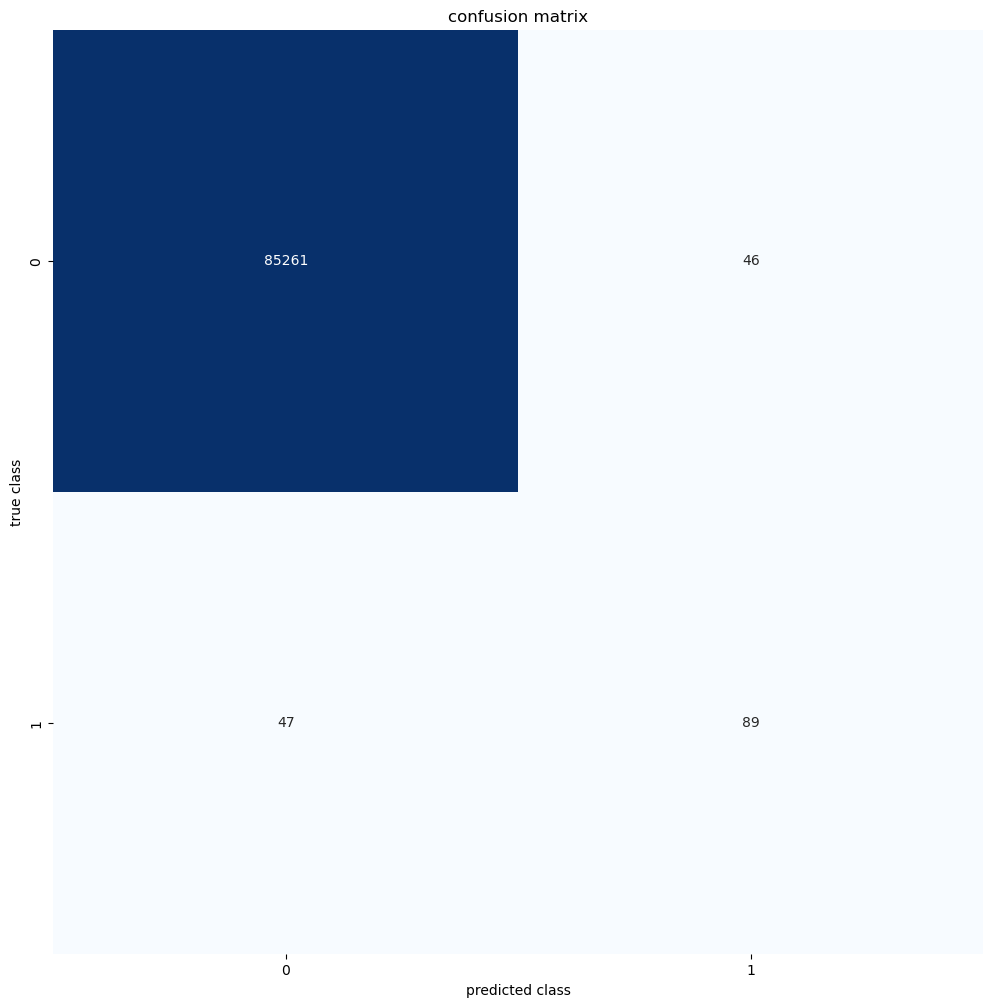

Random Forest:35
0.9989115550718023
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.66      0.65      0.66       136

    accuracy                           1.00     85443
   macro avg       0.83      0.83      0.83     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 900x700 with 0 Axes>

In [54]:
LABLES = ['Normal','fraud']
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize =( 12,12))
sns.heatmap(conf_matrix,annot=True, cmap='Blues',fmt='d',cbar= False)
plt.title("confusion matrix")
plt.ylabel("true class")
plt.xlabel("predicted class")
plt.show()
plt.figure(figsize  = (9,7))
print('{}:{}'.format("Random Forest", n_errors))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

The accuracy is 0.9989115550718023
The precision is 0.6592592592592592
the recall is 0.6544117647058824
the f1-score is 0.6568265682656825


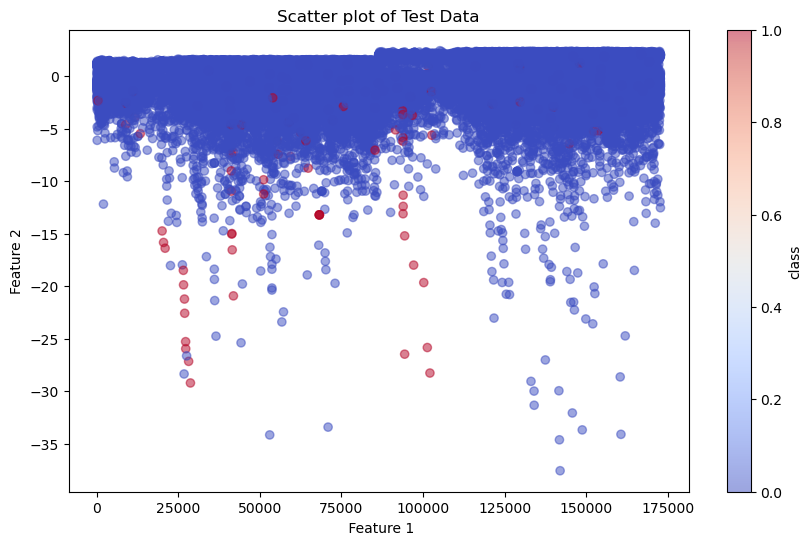

In [58]:

classifier= LogisticRegression()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("The accuracy is {}".format(acc))
prec=precision_score(y_test, y_pred)
print("The precision is {}". format(prec))
rec=recall_score(y_test, y_pred)
print("the recall is {}".format(rec))
f1=f1_score(y_test, y_pred)
print("the f1-score is {}".format(f1))
plt.figure(figsize = (10,6))
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test, cmap='coolwarm', marker='o',alpha=0.5)
plt.title('Scatter plot of Test Data')
plt.xlabel(' Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='class')
plt.show()

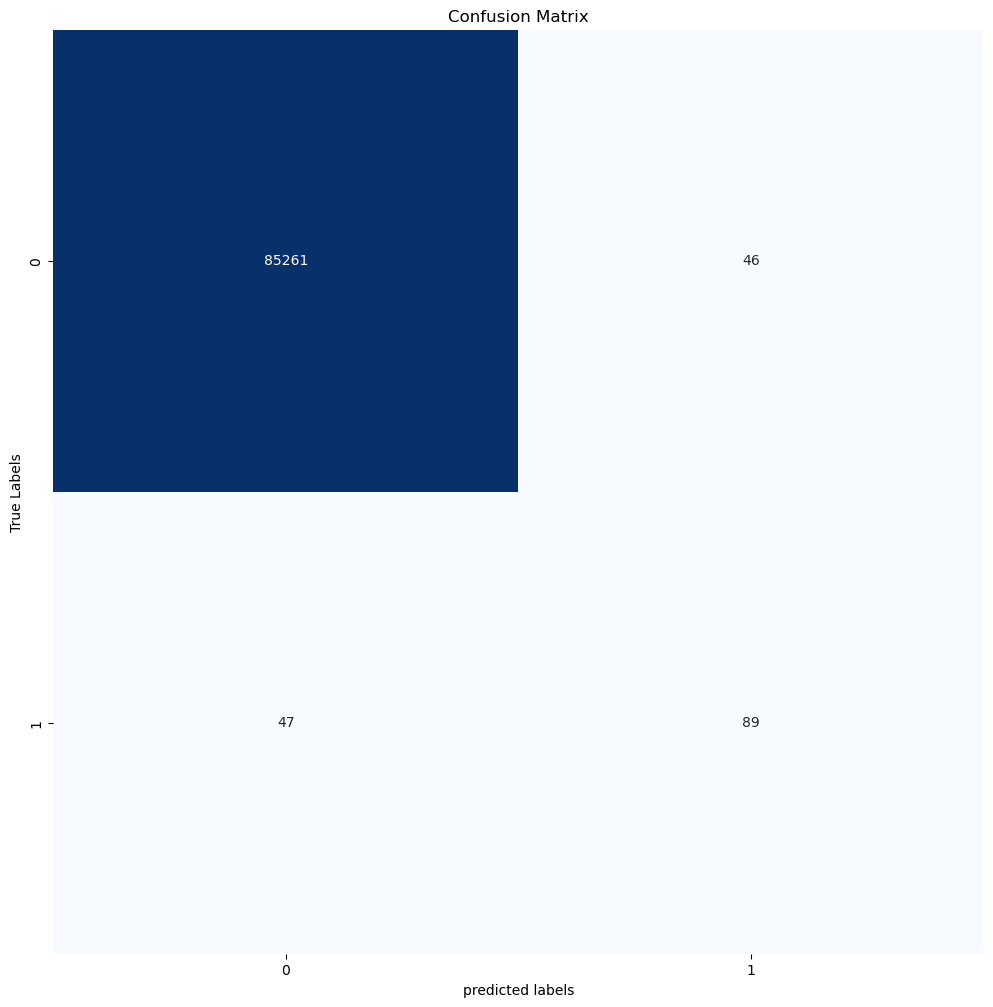

In [60]:
LABELS = ['NORMAL', 'FRAUD']
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True, cmap='Blues',fmt='d',cbar= False)
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('True Labels')
plt.show()